In [1]:
import matplotlib
matplotlib.rc('font', size=16)
import matplotlib.pyplot as plt
import analyze
from channel_dict import channel_dict
import numpy as np
from matplotlib import cm

/project/lgrandi/anaconda3/envs/pax_v6.4.2/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/project/lgrandi/anaconda3/envs/pax_v6.4.2/lib/python3.4/site-packages/hax-1.3.0-py3.4.egg/hax/paxroot.py:17: UserWarning: Error importing ROOT-related libraries: No module named 'ROOT'. If you try to use ROOT-related functions, hax will crash!
  "If you try to use ROOT-related functions, hax will crash!" % e)
/project/lgrandi/anaconda3/envs/pax_v6.4.2/lib/python3.4/site-packages/hax-1.3.0-py3.4.egg/hax/minitree_formats.py:13: UserWarning: Error importing ROOT-related libraries: No module named 'ROOT'. If you try to use ROOT-related functions, hax will crash!
  "If you try to use ROOT-related functions, hax will crash!" % e)


In [14]:
def get_acc_and_occ(runlist_file):
    runlist = []
    # get runs from file
    with open(runlist_file, "r") as f:
        for line,run in enumerate(f):
            if line != 0:
                runlist.append(int(run))

    n_channels = len(channel_dict["all_channels"])

    occ_array = np.ones((n_channels, len(runlist)))

    acc_array = np.ones((n_channels, len(runlist)))

    for i, run in enumerate(runlist):
        thresholds = 60*np.ones(248)#analyze.get_thresholds(5192)
        acc_array[:,i] = analyze.get_acceptances(run, thresholds)

        channels, corrections = analyze.get_corrections(run)

        occ_array[:,i] = -1 * np.log(corrections)
        print(run, occ_array[0,i], acc_array[0,i])

    return acc_array, occ_array

def plot_acc_vs_occ(ch_list, acc_array, occ_array, color = 'k'):
    n_channels = len(acc_array)
    #plot_occ = np.ones(len(ch_list), len(acc_array[0]))
    #plot_acc = np.ones(len(ch_list), len(acc_array[0]))
    for ch, (acc, occ) in enumerate(zip(acc_array, occ_array)):
        if ch not in ch_list:
            continue
        if ch in channel_dict["bottom_channels"]:
            color = 'b'
        elif ch in channel_dict["top_outer_ring"]:
            color = 'r'
        elif ch in channel_dict["top_bulk"]:
            color = 'g'
        plt.scatter(occ, acc, marker = '.', color=color)
    plt.xlim(0,1)    
    plt.show()

In [4]:
runlist="/home/ershockley/xenon1t/analysis/spe_acceptance/runlist_old.txt"
acc, occ = get_acc_and_occ(runlist)

/home/ershockley/xenon1t/analysis/spe_acceptance/analyze.py:250: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  acceptance_fraction[i] *= acceptance[i][bin0 + thresholds[i]]


5039 0.109188301308 0.454447490609
5040 0.643031159101 0.552985638308
5041 0.230204230096 0.475485741056


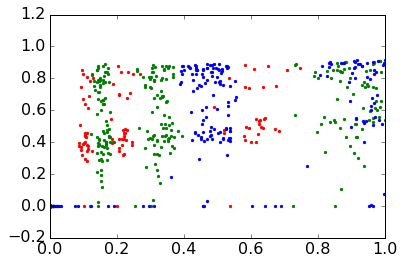

In [5]:
plot_acc_vs_occ(channel_dict["all_channels"], acc, occ)

In [6]:
runs = [5246, 5245, 5242, 5244, 5243, 5236]
voltages = [3.5, 3.55, 3.6, 3.7, 3.84, 3.9]

bot_array = np.ones((len(channel_dict["bottom_channels"]),len(occ[0])))
top_outer_array = np.ones((len(channel_dict["top_outer_ring"]),len(occ[0])))
top_bulk_array = np.ones((len(channel_dict["top_bulk"]),len(occ[0])))

bot_i = 0
to_i = 0
ti_i = 0
for ch, o in enumerate(occ):
    if ch in channel_dict["bottom_channels"]:
        bot_array[bot_i] = o
        bot_i += 1
    elif ch in channel_dict["top_outer_ring"]:
        top_outer_array[to_i] = o
        to_i += 1
    elif ch in channel_dict["top_bulk"]:
        top_bulk_array[ti_i] = o
        ti_i += 1

        
plt.figure(figsize = (10,6))
plt.scatter(voltages, np.mean(bot_array, axis=0), color='b', label="bottom channels")
plt.scatter(voltages, np.mean(top_outer_array, axis=0), color='r', label="top outer ring")
plt.scatter(voltages, np.mean(top_bulk_array, axis=0), color='g', label="top bulk")
plt.ylim(0,1)
plt.xlabel("LED voltage")
plt.ylabel("Occupancy")
plt.legend(loc=2,fontsize='small', frameon=False)
plt.show()

ValueError: x and y must be the same size

In [4]:
thresholds = analyze.get_thresholds(5042)
bottom_run = 5039
top_outer_run = 5040
top_bulk_run = 5041
analyze.get_acceptances_3runs(bottom_run, top_outer_run, top_bulk_run, thresholds)

NameError: name 'n_channels' is not defined

In [3]:
def twoplus_contribution(occ):
    return 1 - np.exp(-occ)*(1+occ)

In [5]:
twoplus_contribution(0.18)

0.014381150534699128

In [8]:
amplitudes, LED = analyze.get_data_array(5152, "LED_charge", errors = False)
amplitudes, noise = analyze.get_data_array(5152, "NOISE_charge", errors = False)

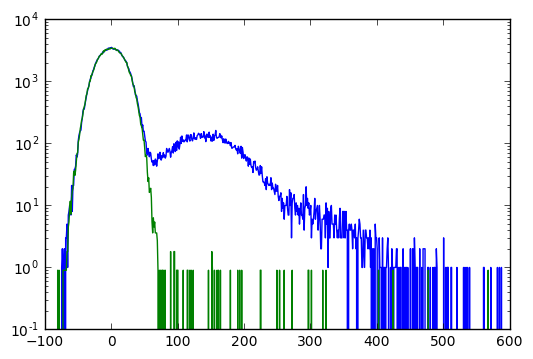

In [20]:
plt.plot(amplitudes, LED[28])
plt.plot(amplitudes, noise[28])
plt.xlim(-100, 600)
plt.yscale('log')
#plt.ylim(1e1, 3e3)
plt.show()

In [12]:
residual = LED - noise

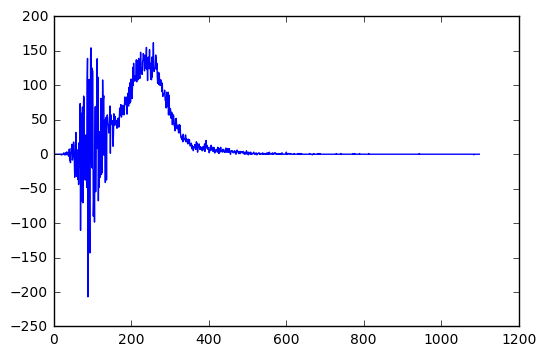

In [19]:
plt.plot(residual[28])
plt.show()